In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
plt.style.use('ggplot')

In [2]:
# read the datafile
df_initial = pd.read_csv('/input/auto_insurance_claims/insurance_claims.csv')
print('Dataframe dimensions:', df_initial.shape)

Dataframe dimensions: (1000, 40)


In [3]:
df_initial.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
# check null values
df_initial.isnull().values.any()

True

In [5]:
df_initial.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## Exploratory Data Analysis

### Identify null values

In [6]:
# a quick check on number of null values of each variable
df_initial.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

all values in variable _c39 are NULLs

In [7]:
# there are values denoted by '?' in some variables, replace question mark with np.nan as new category
df_initial.replace('?', np.nan, inplace = True)

In [8]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

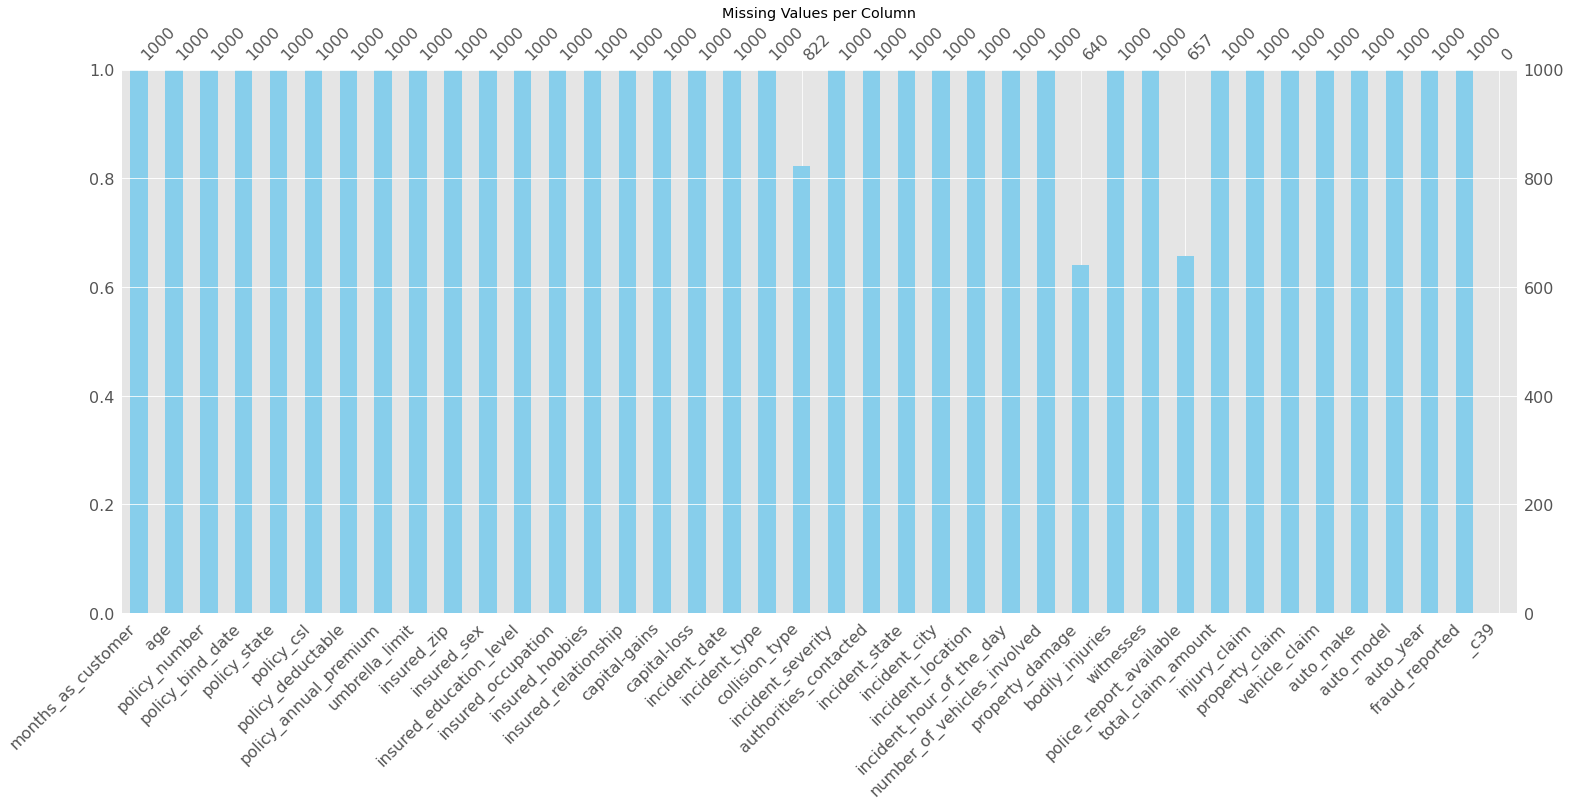

In [9]:
#Visualize NaN values
msno.bar(df_initial, color='skyblue')
plt.title("Missing Values per Column")
plt.show()

### Impute missing values

In [10]:
#collision_type, property_damage and police_report_available are categorical variables, impute mode value

df_initial['collision_type'] = df_initial['collision_type'].fillna(df_initial['collision_type'].mode()[0])


df_initial['property_damage'] = df_initial['property_damage'].fillna(df_initial['property_damage'].mode()[0])


df_initial['police_report_available'] = df_initial['police_report_available'].fillna(df_initial['police_report_available'].mode()[0])

### Variable correlation and multicollinearity

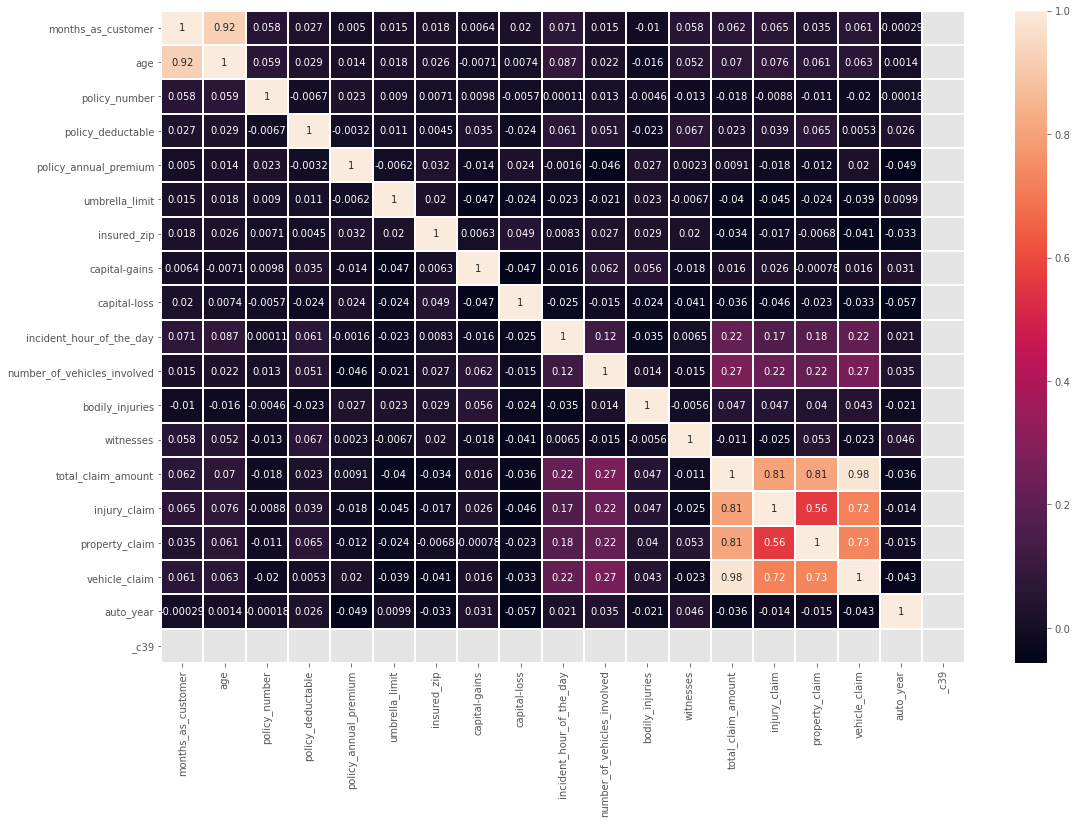

In [11]:
# Look at variable correlation 

plt.figure(figsize = (18, 12))

corr = df_initial.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [12]:
# drop columns that are not necessary for modeling

columns_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df_initial.drop(columns_drop, inplace = True, axis = 1)

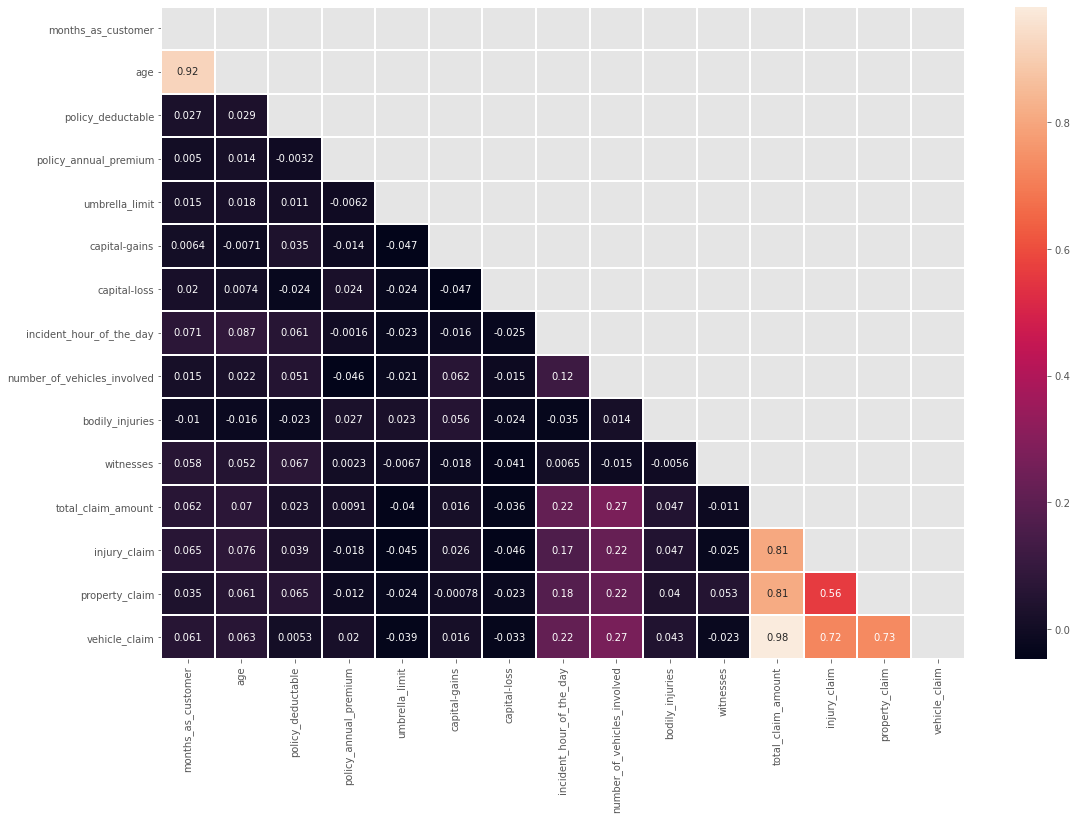

In [13]:
# check for multicollinearity

plt.figure(figsize = (18, 12))

corr = df_initial.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

It can be seen that age and months_as_customer are highly correlated, so drop column "age". There is high correlation between total_clam_amount, injury_claim, property_claim and vehicle_claim, since total claim is the sum of all three other claims, drop the column total_claim_amount.

In [14]:
df_initial.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

## Modeling Data Preparation

In [15]:
# separating the feature and target columns

X = df_initial.drop('fraud_reported', axis = 1)
y = df_initial['fraud_reported']

### Encoding categorical columns

In [16]:
# select only the object columns and check their categories
obj_df = X.select_dtypes(include=['object']).copy()
obj_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [17]:
for col in obj_df:
    print(f"{col}: {obj_df[col].unique()}\n")

policy_csl: ['250/500' '100/300' '500/1000']

insured_sex: ['MALE' 'FEMALE']

insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: ['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: ['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: ['YES' 'NO']

police_report_available: ['YES' 'NO']



In [18]:
#creates dummy/indicator variables for categorical variables
obj_df = pd.get_dummies(obj_df, drop_first = True)
obj_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Extract numerical columns

In [19]:
num_df = X.select_dtypes(include = ['int64', 'float64'])
num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550


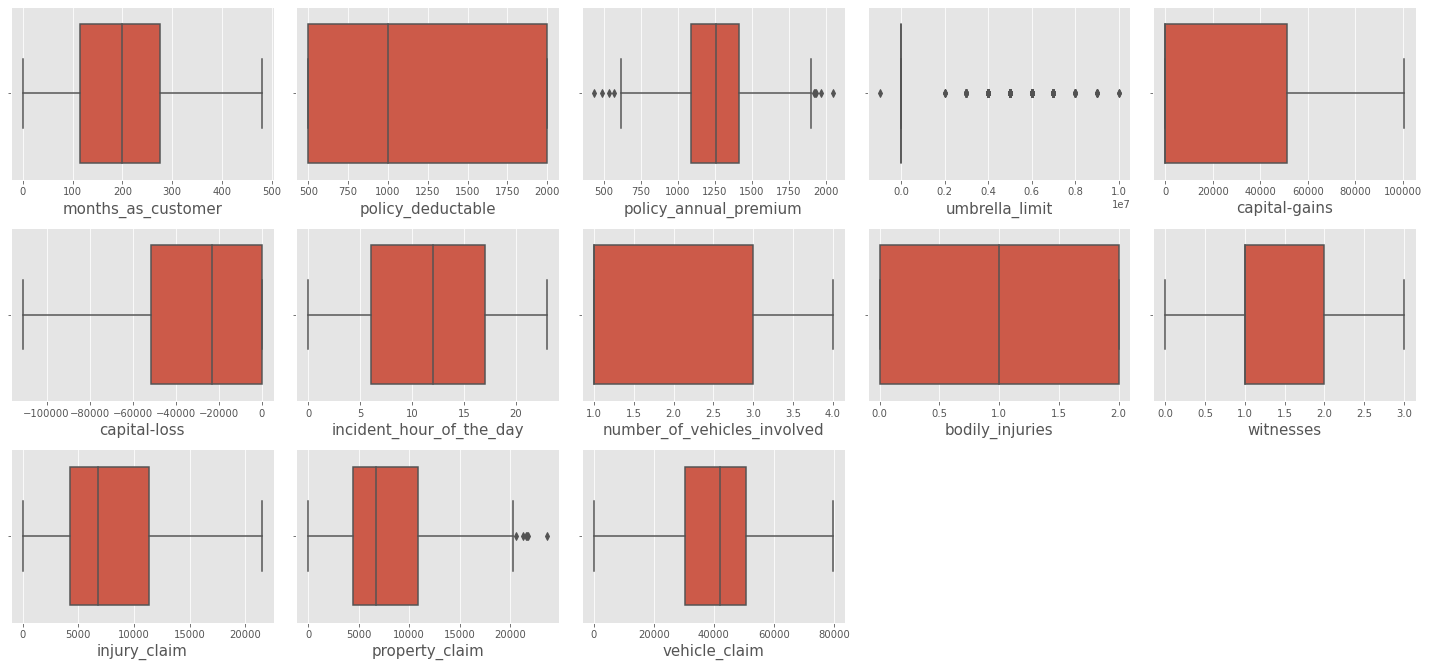

In [20]:
## Outlier Detection 
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_df.columns:
    if plotnumber <= 13:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x=num_df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber = plotnumber+1
plt.tight_layout()
plt.show()

Some numerical columns have wide spread values, standerdization is needed. Before standerdization, split train and test data first.

## Combine Numerical and encoded Categorical columns and split the dataset to train and test dataset

In [21]:
# combine the Numerical and encoded Categorical dataframes to get the final dataset

X = pd.concat([num_df, obj_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [22]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=37)

In [23]:
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
686,190,500,1484.72,5000000,0,0,4,1,0,1,...,0,0,0,1,0,1,0,0,0,0
649,16,1000,968.46,0,50800,-66200,0,3,0,2,...,1,0,1,0,0,0,0,0,0,0
525,41,1000,1383.13,0,46700,0,12,1,1,1,...,0,0,0,1,0,0,0,1,1,0
308,156,1000,1086.48,6000000,0,-53800,17,3,1,1,...,0,0,1,0,0,0,1,0,0,1
720,437,2000,1192.04,0,66100,-31400,23,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [24]:
# Extract numerical columns again from the train dataset for standardization
num_df_2 = X_train[['months_as_customer', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim']]

In [25]:
# Scale the numeric values in the train dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df_2)

In [26]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df_2.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
686,-0.103609,-1.047927,0.923002,1.620945,-0.933123,0.958501,-1.095006,-0.815847,-1.191498,-0.462030,-1.384854,-1.470928,-1.830676
649,-1.634514,-0.227525,-1.170327,-0.496277,0.897265,-1.379570,-1.672642,1.148472,-1.191498,0.445097,-0.183314,1.180560,0.091903
525,-1.414556,-0.227525,0.511075,-0.496277,0.749537,0.958501,0.060267,-0.815847,0.027634,-0.462030,-1.407030,-1.318591,-1.703970
308,-0.402751,-0.227525,-0.691780,2.044390,-0.933123,-0.941623,0.782312,1.148472,0.027634,-0.462030,1.324659,-0.087543,0.967326
720,2.069572,1.413279,-0.263756,-0.496277,1.448543,-0.150494,1.648766,-0.815847,-1.191498,-1.369156,0.735985,0.760604,-0.228527


In [27]:
# Remove original numerical columns from X_train and replace with standardized numerical columns
X_train = X_train.drop(columns = scaled_num_df.columns)

In [28]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)
X_train.head(3)

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
686,-0.103609,-1.047927,0.923002,1.620945,-0.933123,0.958501,-1.095006,-0.815847,-1.191498,-0.462030,...,0,0,0,1,0,1,0,0,0,0
649,-1.634514,-0.227525,-1.170327,-0.496277,0.897265,-1.379570,-1.672642,1.148472,-1.191498,0.445097,...,1,0,1,0,0,0,0,0,0,0
525,-1.414556,-0.227525,0.511075,-0.496277,0.749537,0.958501,0.060267,-0.815847,0.027634,-0.462030,...,0,0,0,1,0,0,0,1,1,0


## Models Development 

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [30]:
# tune parameters
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [31]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8226666666666667


In [32]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

dtc_report = classification_report(y_test, y_pred, output_dict=True)

[[132  50]
 [ 24  44]]
              precision    recall  f1-score   support

           N       0.85      0.73      0.78       182
           Y       0.47      0.65      0.54        68

    accuracy                           0.70       250
   macro avg       0.66      0.69      0.66       250
weighted avg       0.74      0.70      0.72       250



### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

rf_report = classification_report(y_test, y_pred, output_dict=True)

[[152  30]
 [ 35  33]]
              precision    recall  f1-score   support

           N       0.81      0.84      0.82       182
           Y       0.52      0.49      0.50        68

    accuracy                           0.74       250
   macro avg       0.67      0.66      0.66       250
weighted avg       0.73      0.74      0.74       250



### Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

gb_report = classification_report(y_test, y_pred, output_dict=True)

[[ 64 118]
 [ 13  55]]
              precision    recall  f1-score   support

           N       0.83      0.35      0.49       182
           Y       0.32      0.81      0.46        68

    accuracy                           0.48       250
   macro avg       0.57      0.58      0.48       250
weighted avg       0.69      0.48      0.48       250



### Stochastic Gradient Boosting (SGB)

In [38]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

y_pred = sgb.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sgb_report = classification_report(y_test, y_pred, output_dict=True)

[[ 41 141]
 [  9  59]]
              precision    recall  f1-score   support

           N       0.82      0.23      0.35       182
           Y       0.29      0.87      0.44        68

    accuracy                           0.40       250
   macro avg       0.56      0.55      0.40       250
weighted avg       0.68      0.40      0.38       250



### Models Comparison

As we want to compare the successful identification rate of actual frauds, we look at recall value of each model.

In [40]:
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'Gradient Boost', 'SGB'],
    'Score' : [dtc_report['Y']['recall'], rf_report['Y']['recall'], gb_report['Y']['recall'], 
               sgb_report['Y']['recall']]
})

In [41]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,SGB,0.867647
2,Gradient Boost,0.808824
0,Decision Tree,0.647059
1,Random Forest,0.485294


<AxesSubplot:xlabel='Score', ylabel='Model'>

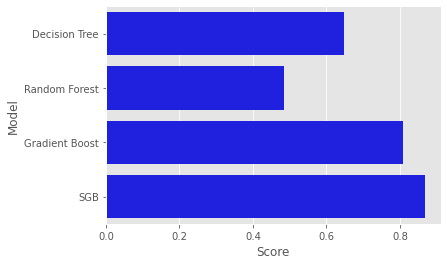

In [42]:
sns.barplot(x = 'Score', y = 'Model', data=models, label = 'Models Comparison', color="b")